In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
book= pd.read_csv("DATA.csv")

In [3]:
book.head()

,Title,Price,Rating,Availability
0,A Light in the Attic,₹ 6031.2,Three,True
1,Tipping the Velvet,₹ 6260.71,One,True
2,Soumission,₹ 5836.65,One,True
3,Sharp Objects,₹ 5571.03,Four,True
4,Sapiens: A Brief History of Humankind,₹ 6317.8,Five,True


In [4]:
book.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Title         1000 non-null   object
 1   Price         1000 non-null   object
 2   Rating        1000 non-null   object
 3   Availability  1000 non-null   bool  
dtypes: bool(1), object(3)
memory usage: 24.5+ KB


In [5]:
book_data= book.copy()
book_data['Price'] = book_data['Price'].str.replace('₹', '', regex=False).str.strip().astype(float)

In [6]:
book_data.head() 

,Title,Price,Rating,Availability
0,A Light in the Attic,6031.20,Three,True
1,Tipping the Velvet,6260.71,One,True
2,Soumission,5836.65,One,True
3,Sharp Objects,5571.03,Four,True
4,Sapiens: A Brief History of Humankind,6317.80,Five,True


In [7]:
book_data.columns

Index(['Title', 'Price', 'Rating', 'Availability'], dtype='object')

In [8]:
book_data = book_data.rename(columns={'Price': 'PriceInRupees'})

In [9]:
book_data.columns

Index(['Title', 'PriceInRupees', 'Rating', 'Availability'], dtype='object')

In [10]:
book_data.shape

(1000, 4)

In [11]:
book_data['Rating'].unique()

array(['Three', 'One', 'Four', 'Five', 'Two'], dtype=object)

In [12]:
rating_conversion= {
    "One": 1,
    "Two": 2,
    "Three": 3,
    "Four": 4,
    "Five": 5
}
book_data_1= book_data.copy()

In [13]:
book_data_1['Rating']= book_data_1['Rating'].map(rating_conversion)
book_data_1.head()

,Title,PriceInRupees,Rating,Availability
0,A Light in the Attic,6031.20,3,True
1,Tipping the Velvet,6260.71,1,True
2,Soumission,5836.65,1,True
3,Sharp Objects,5571.03,4,True
4,Sapiens: A Brief History of Humankind,6317.80,5,True


In [14]:
book_data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Title          1000 non-null   object 
 1   PriceInRupees  1000 non-null   float64
 2   Rating         1000 non-null   int64  
 3   Availability   1000 non-null   bool   
dtypes: bool(1), float64(1), int64(1), object(1)
memory usage: 24.5+ KB


In [15]:
book_data_1['Availability'].unique()

array([ True])

In [16]:
not_required= ['Availability']
book_data_2= book_data_1.copy().drop(columns= not_required)

In [17]:
book_data_2.head()

,Title,PriceInRupees,Rating
0,A Light in the Attic,6031.20,3
1,Tipping the Velvet,6260.71,1
2,Soumission,5836.65,1
3,Sharp Objects,5571.03,4
4,Sapiens: A Brief History of Humankind,6317.80,5


In [18]:
duplicates= book_data_2[book_data_2.duplicated()]
duplicates

,Title,PriceInRupees,Rating


In [19]:
for i in book_data_2.columns:
    print(f"{i:<15}: {len(book_data_2[i].unique()):>03} unique values.")

Title          : 999 unique values.
PriceInRupees  : 903 unique values.
Rating         : 005 unique values.


In [20]:
duplicate= book_data_2[book_data_2['Title'].duplicated(keep= False)]
duplicate

,Title,PriceInRupees,Rating
236,The Star-Touched Queen,5361.33,5
358,The Star-Touched Queen,3762.95,5


In [21]:
book_data_2.describe().transpose().style.format('{:.2f}')

,count,mean,std,min,25%,50%,75%,max
PriceInRupees,1000.00,4085.70,1683.04,1165.00,2575.53,4191.67,5528.80,6988.84
Rating,1000.00,2.92,1.43,1.00,2.00,3.00,4.00,5.00


In [22]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'petroff10',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [23]:
plt.style.use('bmh')

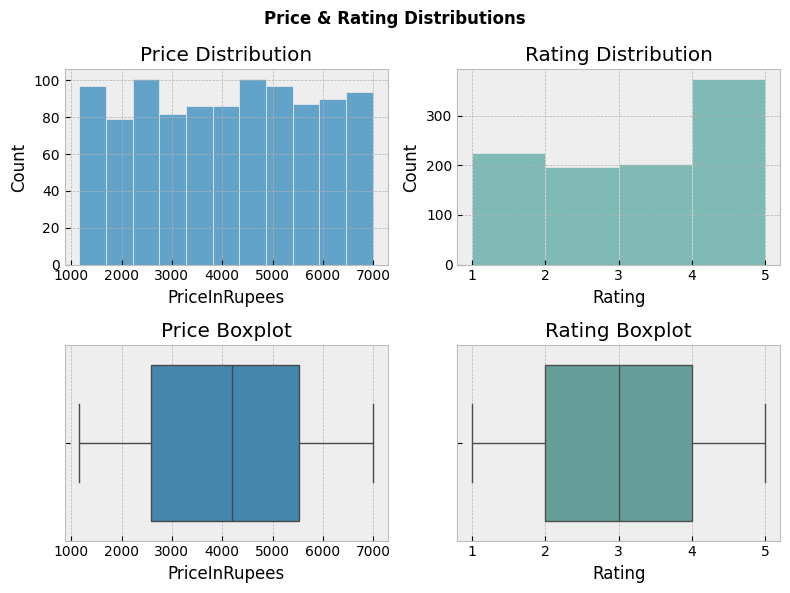

In [24]:
fig, axs = plt.subplots(2, 2, figsize=(8, 6))
titles = ['Price Distribution', 'Rating Distribution', 'Price Boxplot', 'Rating Boxplot']

# Unpack axes from 2x2 grid
ax1, ax2 = axs[0]
ax3, ax4 = axs[1]

# Plot using correct axes
sns.histplot(data=book_data_2, x="PriceInRupees", ax=ax1)
sns.histplot(data=book_data_2, x="Rating", color="#5AA9A2", bins=np.arange(1, 6, 1), ax=ax2)

sns.boxplot(x=book_data_2["PriceInRupees"], ax=ax3)
sns.boxplot(x=book_data_2["Rating"], color="#5AA9A2", ax=ax4)

# Add titles
ax1.set_title(titles[0])
ax2.set_title(titles[1])
ax3.set_title(titles[2])
ax4.set_title(titles[3])
fig.suptitle(f'Price & Rating Distributions', fontweight="bold")

plt.tight_layout()
plt.show()

In [25]:
a= 1000
b= 0 
x= y= ""
for i in book_data_2['Title']:
    if a > len(i):
        a= len(i)
        x= i
    elif b< len(i):
        b= len(i)
        y= i
print(f"{a:>03}: {x}")
print(f"{b}: {y}")

002: It
205: At The Existentialist CafÃ©: Freedom, Being, and apricot cocktails with: Jean-Paul Sartre, Simone de Beauvoir, Albert Camus, Martin Heidegger, Edmund Husserl, Karl Jaspers, Maurice Merleau-Ponty and others


In [26]:
corr_val = book_data_2["PriceInRupees"].corr(book_data_2["Rating"])
print(f"The pearson correlation coefficient between 'price' and 'rating' is: {round(corr_val, 3):.2f}")

The pearson correlation coefficient between 'price' and 'rating' is: 0.03


In [27]:
book_data_3= book_data_2.copy()
# create custom index column
custom_index_col = pd.RangeIndex(start=1001, stop=1001+len(book_data_3), step=1, name='BookID')

# add index column to dataframe
book_data_3.index = custom_index_col
book_data_3.index = 'ID-' + book_data_3.index.astype('string')

# view glimpse of data
book_data_3.head()

,Title,PriceInRupees,Rating
BookID,,,
ID-1001,A Light in the Attic,6031.20,3
ID-1002,Tipping the Velvet,6260.71,1
ID-1003,Soumission,5836.65,1
ID-1004,Sharp Objects,5571.03,4
ID-1005,Sapiens: A Brief History of Humankind,6317.80,5


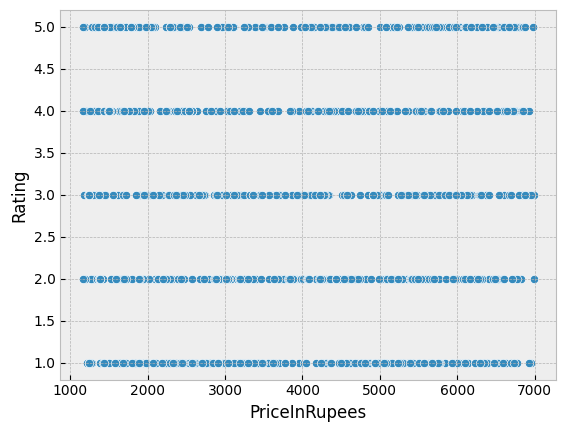

In [28]:
sns.scatterplot(x= 'PriceInRupees', y= "Rating", data= book_data_3)
plt.show()

In [29]:
print(min([x for x in book_data_3['PriceInRupees']]))


1165.0


In [30]:
book_data_3['ValueScore'] = book_data_3['Rating'] / book_data_3['PriceInRupees']

In [31]:
book_data_3.head()

,Title,PriceInRupees,Rating,ValueScore
BookID,,,,
ID-1001,A Light in the Attic,6031.20,3,0.000497
ID-1002,Tipping the Velvet,6260.71,1,0.000160
ID-1003,Soumission,5836.65,1,0.000171
ID-1004,Sharp Objects,5571.03,4,0.000718
ID-1005,Sapiens: A Brief History of Humankind,6317.80,5,0.000791


In [32]:
print(book_data_3['ValueScore'].min())
print(book_data_3['ValueScore'].max())

0.00014392506685319354
0.004291845493562232


In [33]:
book_data_4= book_data_3.copy()
book_data_4['ValueScore']= (book_data_4['ValueScore']- book_data_3['ValueScore'].min())/(book_data_3['ValueScore'].max() - book_data_3['ValueScore'].min())

In [34]:
print(book_data_4['ValueScore'].min())
print(book_data_4['ValueScore'].max())

0.0
1.0


In [35]:
book_data_4.head()

,Title,PriceInRupees,Rating,ValueScore
BookID,,,,
ID-1001,A Light in the Attic,6031.20,3,0.085221
ID-1002,Tipping the Velvet,6260.71,1,0.003809
ID-1003,Soumission,5836.65,1,0.006607
ID-1004,Sharp Objects,5571.03,4,0.138401
ID-1005,Sapiens: A Brief History of Humankind,6317.80,5,0.156100


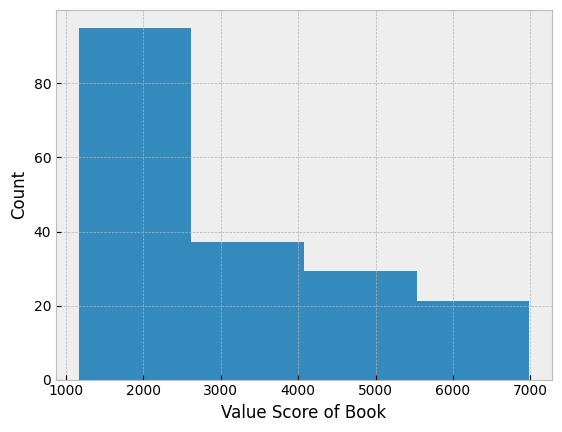

In [36]:
plt.hist(book_data_4['PriceInRupees'], bins=4, weights=book_data_4['ValueScore'])
plt.xlabel('Value Score of Book')
plt.ylabel('Count')

plt.show()

In [37]:
book_data_5= book_data_4.sort_values(by= 'ValueScore', ascending= False).copy()

In [38]:
book_data_5.head()

,Title,PriceInRupees,Rating,ValueScore
BookID,,,,
ID-1639,An Abundance of Katherines,1165.00,5,1.000000
ID-1303,Greek Mythic History,1191.80,5,0.976733
ID-1591,The Power Greens Cookbook: 140 Delicious Super...,1287.33,5,0.901677
ID-1317,Dear Mr. Knightley,1305.97,5,0.888312
ID-1602,The Darkest Corners,1319.94,5,0.878543


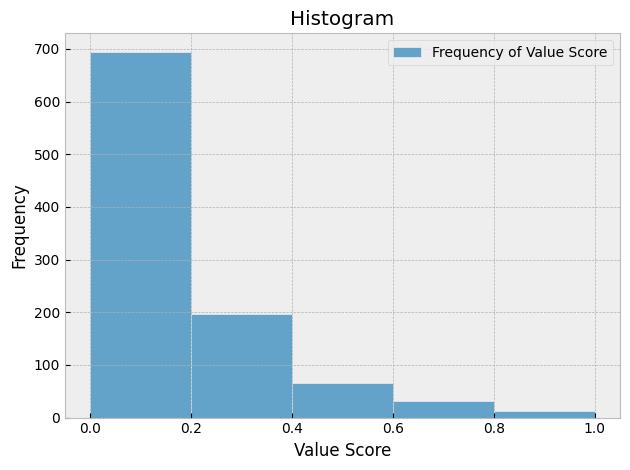

In [39]:
sns.histplot(book_data_4['ValueScore'],bins= 5, label= "Frequency of Value Score")
plt.xlabel("Value Score") 
plt.ylabel("Frequency")
plt.title("Histogram")
plt.legend()
plt.tight_layout()
plt.show()

In [40]:
book_data_6= book_data_5.copy()
book_data_6['ValueScoreGroup'] = pd.cut(book_data_6['ValueScore'],
                                    bins=[-0.01, 0.33, 0.66, 1.01],
                                    labels=['Low', 'Medium', 'High'])


In [41]:
book_data_6.head()

,Title,PriceInRupees,Rating,ValueScore,ValueScoreGroup
BookID,,,,,
ID-1639,An Abundance of Katherines,1165.00,5,1.000000,High
ID-1303,Greek Mythic History,1191.80,5,0.976733,High
ID-1591,The Power Greens Cookbook: 140 Delicious Super...,1287.33,5,0.901677,High
ID-1317,Dear Mr. Knightley,1305.97,5,0.888312,High
ID-1602,The Darkest Corners,1319.94,5,0.878543,High


In [42]:
corr_val = book_data_6["ValueScore"].corr(book_data_6["Rating"])
print(f"The pearson correlation coefficient between 'Value Score' and 'Rating' is: {round(corr_val, 3):.2f}")

The pearson correlation coefficient between 'Value Score' and 'Rating' is: 0.62


In [43]:
corr_val = book_data_6["ValueScore"].corr(book_data_6["PriceInRupees"])
print(f"The pearson correlation coefficient between 'Value Score' and 'Price' is: {round(corr_val, 3):.2f}")

The pearson correlation coefficient between 'Value Score' and 'Price' is: -0.63
